## &#128640; Team4_유니콘기업분석

### &#9989; EDA 요약

- 연매출액, 월별 연금보험료, 월별 직원수가 큰 회사, 즉 회사의 규모가 커지면 커질수록 상위 그룹의 회사에서는 값의 분포가 크게 나타난다.
- 연매출액이 가장 큰 규모의 회사들 중 1인당 매출액이 적을수록 월별 연금 보험료와 월별 직원수가 더 많아진다.
- 직원이 많을수록 급여(고정비) 대비 매출 가치 낮은 것으로 추측된다.
------
#### 1. 따라서 적정 수준의 직원과 연금보험료를 내면서도 높은 매출액을 유지하는 회사가 가치가 큰 것으로 보인다.<br>2. 연매출액 기준 규모가 큰 기업들을 선분류하고, 그 안에서 미시적인 분석을 진행한다.<br>3. 회사의 규모가 큰 그룹일수록 데이터의 분포가 매우 넓기 때문에, 성장률에 초점을 맞춰 분석을 진행한다.
------
### &#10010; EDA 상세

#### import 모듈

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Hierarchical clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

#### PC 세팅

In [3]:
%matplotlib inline
sns.set_style(style="white")
sns.set()

# (Windows OS) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  
# (MAC OS)
# plt.rcParams['font.family'] = 'AppleGothic'  
# 문자 - (마이너스) 정상 출력을 위한 코드
plt.rcParams['axes.unicode_minus'] = False
# 경고 제거
plt.rcParams.update({'figure.max_open_warning': 0})
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

#### 데이터 Read

In [4]:
# 데이터 파일 read (각자의 경로 입력)
wanted_nps_df=pd.read_csv('./company_nps_data.csv', encoding='cp949')

In [5]:
wanted_nps_df.info()
wanted_nps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


### 데이터 전처리
* 직원이 0명인 경우와 연매출액이 마이너스인 경우 제외 처리
* 가져온 데이터를 추가 활용하기 위해 직원 1명당 매출액을 보여주는 컬럼 추가

In [6]:
# 이상치 제외
wanted_nps_df = wanted_nps_df.drop(index=wanted_nps_df.query('연매출액 < 0').index)
wanted_nps_df = wanted_nps_df.drop(index=wanted_nps_df.query('월별_직원수 == 0').index)

In [7]:
wanted_nps_df.groupby(['회사ID', '년도'])['연매출액','월별_연금보험료','월별_직원수'].agg('mean')

<ipython-input-7-76942f4c44f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wanted_nps_df.groupby(['회사ID', '년도'])['연매출액','월별_연금보험료','월별_직원수'].agg('mean')


,,연매출액,월별_연금보험료,월별_직원수
회사ID,년도,,,
63,2018,11328779396.00,410128228.33,1007.17
95,2018,656947437.00,214837843.33,541.00
102,2018,742658938.00,173769522.50,752.12
295,2018,83776697.00,77312035.00,259.50
414,2018,19732769.00,77590193.33,247.58
...,...,...,...,...
2400284,2018,1263406.00,1055497.14,4.71
2437574,2018,214016.00,636740.00,3.00
2693684,2019,238076.00,438120.00,3.00


In [8]:
# 직원 1인당 매출액 컬럼 추가
wanted_nps_df['인당_매출액'] = wanted_nps_df['연매출액'] / wanted_nps_df['월별_직원수']
wanted_nps_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
0,233757,41688077,2018,7,8912380,36,1158002.14
1,123464,1760695,2018,3,942380,5,352139.00
2,342124,3221341,2018,7,781180,4,805335.25
3,386420,4815584,2015,11,3795900,14,343970.29
4,129243,9799736,2018,10,40724680,151,64898.91
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,420965.64
99797,239388,1045021,2018,10,1428800,9,116113.44
99798,272304,181898,2018,3,392560,4,45474.50
99799,362194,2100218,2018,12,874780,3,700072.67


✔️ <b>인당매출액 구할때 해당연도 평균직원수가 아닌 월별 직원수로 나누는 경우 결과가 달라짐

In [9]:
# # 특정 회사, 연도 자료로 확인
# a = wanted_nps_df[(wanted_nps_df['회사ID']==233757)&(wanted_nps_df['년도']==2018)]
# a

In [10]:
# a['월별_직원수'].mean()

In [11]:
# # 현재 계산되어 있는 인당매출액의 평균
# a['인당_매출액'].mean()

In [12]:
# # 2018년 연매출액 / 평균 직원수 계산한 값
# a['연매출액'].mean()/a['월별_직원수'].mean()

In [13]:
# 데이터의 통계량
wanted_nps_df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
count,99776.00,99776.00,99776.00,99776.00,99776.00,99776.00,99776.00
mean,276263.21,30544049.77,2016.97,6.71,9736289.82,37.63,594450.03
std,133891.07,301701995.99,0.98,3.51,43477779.16,146.96,1477181.20
min,63.00,300.00,2015.00,1.00,90000.00,3.00,75.00
25%,165530.00,1409955.00,2016.00,4.00,1181815.00,6.00,141982.52
50%,259149.00,3573585.00,2017.00,7.00,2334120.00,11.00,286197.50
75%,382651.00,9592327.00,2018.00,10.00,5592145.00,24.00,586500.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00,50784748.67


In [14]:
# 회사ID 고유 건수
print("전처리 후 기업 수: ", len(set(wanted_nps_df['회사ID'])))

전처리 후 기업 수:  4998


### 데이터 통계
* 4998개 기업의 2015년~2019년까지의 데이터 (날짜는 기업별 상이)
* (참고) 각 Row 기준의 통계 / 회사, 일자 구분 X
***
- 최대 연매출액: 약 11조 3천억원
- 최대 월별 연금보험료: 약 9억 7천만원
- 최대 월별 직원수: 약 3100명
***
- 평균 연매출액: 약 300억원
- 평균 월별 연금보험료: 약 970만원
- 평균 월별 직원수: 약 37명
***
- 최소 연매출액: 약 30만원
- 최소 월별 연금보험료: 약 9만원
- 최소 월별 직원수: 3명

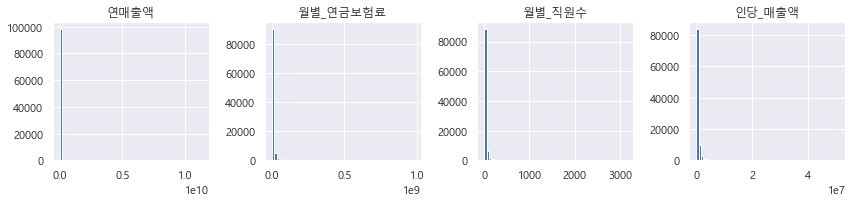

In [15]:
wanted_nps_df.hist(bins=60, column=['연매출액','월별_연금보험료','월별_직원수','인당_매출액'],
                   figsize=(12,3), layout=(1,4));
plt.tight_layout()

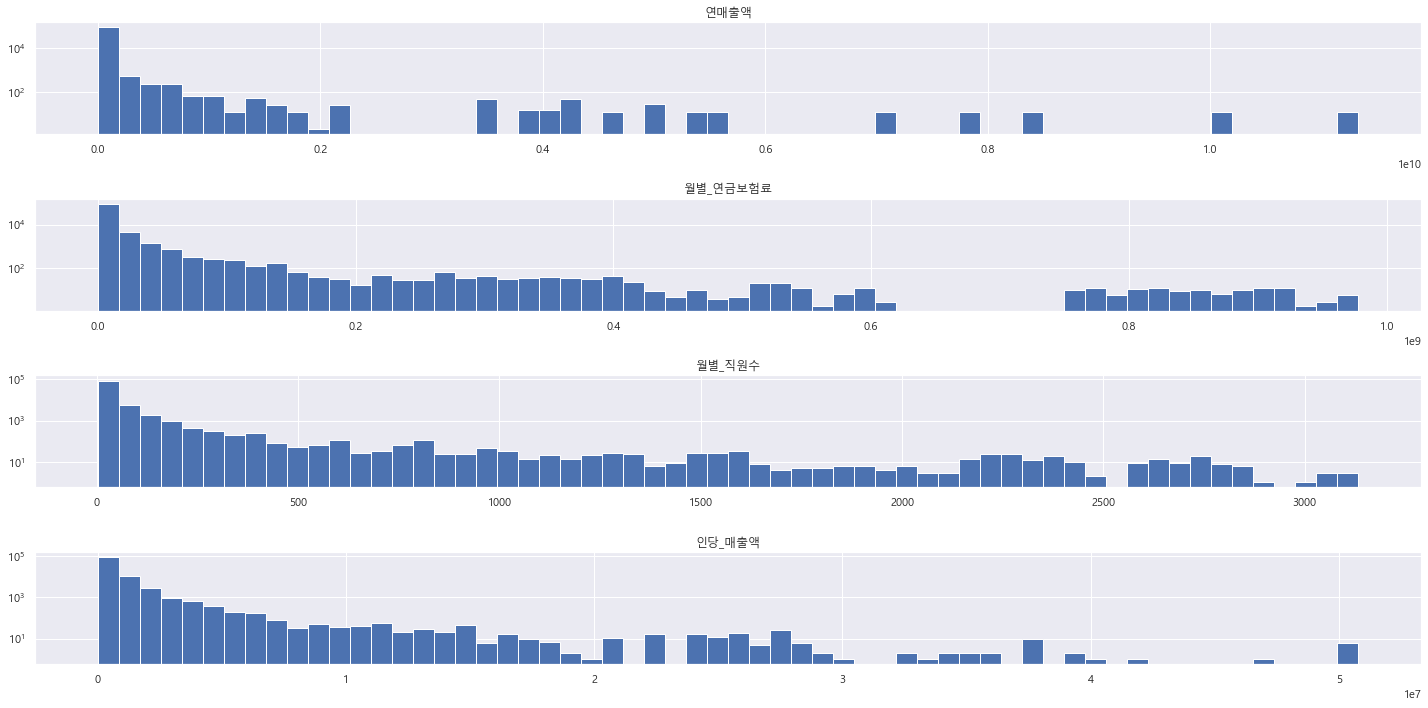

In [16]:
# 히스토그램을 통해 데이터 분포를 시각화
# 값이 작은 회사가 압도적으로 많기 때문에 전체적인 내용 확인을 위해 값에 log를 적용
wanted_nps_df.hist(bins=60, column=['연매출액','월별_연금보험료','월별_직원수','인당_매출액'],
                   figsize=(20,10), layout=(4,1), log=True);
plt.tight_layout()

In [17]:
# 위 히스토그램의 영역을 binning하여 그룹핑, 본 작업을 통해 항목 규모별 데이터 분포 및 특징 파악
# binning 작업: 데이터를 값으로 오름차순 정렬하여, 동일한 개수가 되도록 bin 그룹을 나눔

# 전체 Rows를 기준으로 10개의 bin으로 구분
n_bins = 5
# bin의 이름(라벨)
bin_labels = list(range(1,n_bins+1))

for column in ['연매출액','월별_연금보험료','월별_직원수','인당_매출액']:
    new_column = column+"bin"
    wanted_nps_df.loc[:,new_column] = pd.qcut(wanted_nps_df[column], n_bins, labels=bin_labels)
    
wanted_nps_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액,연매출액bin,월별_연금보험료bin,월별_직원수bin,인당_매출액bin
0,233757,41688077,2018,7,8912380,36,1158002.14,5,5,5,5
1,123464,1760695,2018,3,942380,5,352139.00,2,1,1,3
2,342124,3221341,2018,7,781180,4,805335.25,3,1,1,5
3,386420,4815584,2015,11,3795900,14,343970.29,3,4,3,3
4,129243,9799736,2018,10,40724680,151,64898.91,4,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,420965.64,3,3,3,4
99797,239388,1045021,2018,10,1428800,9,116113.44,1,2,3,1
99798,272304,181898,2018,3,392560,4,45474.50,1,1,1,1
99799,362194,2100218,2018,12,874780,3,700072.67,2,1,1,4


In [18]:
bin5 = wanted_nps_df[wanted_nps_df['연매출액bin']==5]
bin5.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액,연매출액bin,월별_연금보험료bin,월별_직원수bin,인당_매출액bin
0,233757,41688077,2018,7,8912380,36,1158002.14,5,5,5,5
8,133518,18642904,2018,10,16844840,75,248572.05,5,5,5,3
12,295938,13589790,2016,12,13187980,66,205905.91,5,5,5,2
19,129310,43360251,2018,9,37862680,149,291008.40,5,5,5,3
22,137755,13796240,2017,12,9385540,49,281555.92,5,5,5,3


In [19]:
bin5.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
count,19948.00,19948.00,19948.00,19948.00,19948.00,19948.00,19948.00
mean,245304.76,138699839.89,2016.98,6.72,36531817.86,131.67,1534103.80
std,122596.61,663809938.50,0.94,3.52,92194428.34,309.32,3033490.74
min,63.00,13040351.00,2015.00,1.00,410740.00,3.00,28429.06
25%,133756.00,17819592.00,2016.00,4.00,5064505.00,21.00,363551.47
50%,232159.00,27593685.00,2017.00,7.00,12060860.00,47.00,715493.99
75%,319816.00,52879253.00,2018.00,10.00,26572335.00,101.00,1497175.00
max,635082.00,11328779396.00,2019.00,12.00,978067260.00,3133.00,50784748.67


### &#10145; Binning을 기준으로 데이터 EDA (Boxplot & Scatter chart 활용)<br>

#### 1. Boxplot 해석 요약

--------

- 연매출액bin, 월별 연금보혐료bin, 월별 직원수bin이 클수록 (5번에 가까워질수록)<br>연매출액, 월별 연금보혐료, 월별 직원수의 스펙트럼(분포 차이)가 더 넓어진다.<br>가장 높은 5번 bin의 경우 각 항목들의 5번 bin에서  상위 50%를 기준으로 굉장히 넓은 분포를 가진다.

- 연매출액bin, 1인당 매출액bin이 클수록(5번에 가까워질수록) 연매출액의 스펙트럼이 더 넓어진다.<br>특히 1인당 매출액의 5번 bin에서 상위 50%를 기준으로 굉장히 넓은 분포를 가진다.

- But, 연매출액이 가장 크고, 1인당 매출액이 가장 적은 bin일수록<br>월별 연금보험료와 월별 직원수가 더 많아진다. (상위 50% 기준으로 더 벌어짐)

##### (추론)
1. 회사의 규모가 커질수록 더 급격한 가치 성장이 이뤄지는 것으로 추측.
2. 1인당 매출액이 연매출액과 강한 연관이 있는 것으로 추측.
3. 직원이 많을수록 매출 대비 급여(고정비)가 낮은 가치를 내는 것으로 추측.


##### (정리)
1. 연매출액과 1인당 매출이 함께 크면서도, 직원이 적어 고정비가 적게 운영될 수 있는 기업이 유니콘으로 보인다.
2. 규모가 큰 기업들에 초점을 맞춰 미시적인 분석이 필요할 것으로 보임.

In [20]:
# # 마스터 컬럼 리스트
# boxplot_bin_column = ['연매출액bin','월별_연금보험료bin', '월별_직원수bin','인당_매출액bin']

# # 마스터 컬럼 리스트를 기준으로 구분
# for column in boxplot_bin_column:
    
#     for column_2 in boxplot_bin_column:
#         # X축이 마스커 컬럼 리스트 구분과 같지 않은 경우 (ex. '연매출액bin' 기준으로 차트를 구분하는데, '연매출액bin'이 X축으로 안쓰이는 경우)
#         if column_2 != column:
#             # Y축은 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
#             for column_3 in boxplot_bin_column:
#                 g = sns.FacetGrid(wanted_nps_df, col=column, sharey=False)
#                 g.map(sns.boxplot, column_2, column_3[:-3], order=bin_labels, showfliers=False);

#### 2. Scatter chart 해석 요약

--------

- 일정 규모 이상의 회사는 월별 직원수와 월별 연금보험료가 연매출액과 양의 상관관계가 있다.
- 하지만 일정 규모 이상의 회사에서는 직원이 많을수록 매출이 작아지는 약한 관계를 확인할 수 있다.<br>1인당 매출액이 클수록 연매출액에 작아지는 관계 역시 확인할 수 있다.
- 또한, 월별 연금보험료는 일정 규모 이상의 회사에선 연매출액과 1인당 매출액과 관계가 적어진다.

##### (추론)
1. 직원수와 연금보험료가 많으면 매출이 크다고 볼 수 있지만, 매출의 질이 반드시 높다고 볼 수 없다고 추측함.
2. 일정 규모 이상이 되면, 연봉테이블이 넓어져 연금보험료를 가치 판단의 기준으로 보기 무리가 있다고 추측함.

##### (정리)
1. 적정 수준의 직원과 연봉을 유지하면서, 매출이 높은 회사가 가치가 큰 회사로 보인다.

In [21]:
# # 마스터 컬럼 리스트를 기준으로 구분
# for column in boxplot_bin_column:
    
#     for column_2 in boxplot_bin_column:
       
#             # X, Y축 모두 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
#             for column_3 in boxplot_bin_column:
                
#                 g = sns.FacetGrid(wanted_nps_df, col=column, sharex=False, sharey=False)
#                 g.map(plt.scatter, column_2[:-3], column_3[:-3], alpha = .4); #alpha는 점의 투명도

### &#9989; EDA 요약

- 연매출액, 월별 연금보험료, 월별 직원수가 큰 회사, 즉 회사의 규모가 커지면 커질수록 상위 그룹의 회사에서는 값의 분포가 크게 나타난다.
- 연매출액이 가장 큰 규모의 회사들 중 1인당 매출액이 적을수록 월별 연금 보험료와 월별 직원수가 더 많아진다.
- 직원이 많을수록 급여(고정비) 대비 매출 가치 낮은 것으로 추측된다.<br>
------
1. 따라서 적정 수준의 직원과 연금보험료를 내면서도 높은 매출액을 유지하는 회사가 가치가 큰 것으로 보인다.
2. 연매출액 기준 규모가 큰 기업들을 선분류하고, 그 안에서 미시적인 분석을 진행한다.
3. 회사의 규모가 큰 그룹일수록 데이터의 분포가 매우 넓기 때문에, 성장률에 초점을 맞춰 분석을 진행한다.
------
### &#9989; 유니콘 기업 선정 분석의 가설

#### &#10145; 가설

1. 해당연도 연매출액이 1,000억원을 초과하는 기업 중
2. **연매출액 성장률, 연 기준 월별 연금보험료 중위값 상승률, 연평균 직원수 상승률, 연평균 1인당 매출액 상승률**의 평균이<br>급상승한 기업이 유니콘 기업일 것이다.

#### &#10145; 가설의 근거

1. 대한민국 유니콘 기업의 등재 시점을 기준 당시 연매출액은 1,000억원 이상이다. (에이프로젠 제약 제외)<br>따라서 주어진 데이터 중 연매출액 1,000억원 초과를 1번 조건으로 한다.
2. 연매출의 급성장은 유니콘 기업 선정의 중요 조건이다. 그 이유는 매출 급성장의 의미는 투자자로부터 비즈니스를 인정받아 큰 투자를 받았거나,<br>비즈니스 모델이 성공적으로 자리 잡았거나, 시장이 해당 기업을 원한다는 의미로 볼 수 있기 때문이다.<br>따라서 전년 대비 매출 급성장을 유니콘 기업 선정의 주요 조건으로 설정한다.
3. 직원들의 높은 연봉은 회사의 가치를 나타내는 주요 지표 중 하나이다.<br>EDA 결과 일정 규모 이상의 연매출액이 발생하는 기업들은 직원수가 많아질수록 월별 연금 보험료가 자연스럽게 증가한다.<br>월별 연금보험료의 상승은 회사의 연봉 테이블의 폭이 넓어졌다는 것으로도 해석할 수 있기 때문에<br>전체적인 직원 연봉의 상승을 확인하기 위해 월별 연금보험료의 중위값을 기준으로 상승률을 확인한다.<br>
4. 1인당 매출액은 기업이 내부의 리소스를 얼마나 효과적으로 쓰는지 보여주는 지표로 볼 수 있다.<br>2번과 3번 조건이 동일하다면, 더 효과적으로 리소스를 사용하는 기업이 더 높이 평가될 수 있다.
------
------

## &#128640; 유니콘 기업 선정 분석의 방법

1. 연매출액이 1,000억원을 초과하는 기업 필터링
2. 연매출 성장률, 연평균 직원수 성장률, 연금보험료 중위값 상승률, 1인당 매출액 상승률을 바탕으로 유니콘 지수 산출
3. 유니콘 지수(P_unicorn)가 높은 기업 선정 (+클러스터링을 통한 Cross check)

### &#128246; P_unicorn = (0.5 * P_sales) + (0.2 * P_arpu) + (0.2 * P_pension) + (0.1 * P_employee)
- 각 항목이 유니콘 기업을 선정하는데 기여하는 정도를 고려하여<br>평가지수 별 가중치를 0.5/0.2/0.2/0.1로 선정 (가중치 값은 변경 가능)
- 가중치 선정의 이유:<br>- 매출 성장은 기업 가치 평가의 가장 중요한 요인이다.<br>- 직원 상승보다 1인당 매출액과 직원의 질 상승이 기업 가치 평가에 보다 중요하다고 판단한다.

### &#10145; 1. 연매출액이 1,000억원을 초과하는 기업 필터링
-----

In [22]:
filtered_df = wanted_nps_df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
filtered_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액,연매출액bin,월별_연금보험료bin,월별_직원수bin,인당_매출액bin
0,63,11328779396,2018,1,403119840,1006,11261212.12,5,5,5,5
1,63,11328779396,2018,2,406770960,1018,11128466.99,5,5,5,5
2,63,11328779396,2018,3,404826240,1013,11183395.26,5,5,5,5
3,63,11328779396,2018,4,404211800,1012,11194446.04,5,5,5,5
4,63,11328779396,2018,5,400339640,1002,11306167.06,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
99771,3312354,1451563,2019,9,1312200,3,483854.33,2,2,1,4
99772,3312354,1451563,2019,10,1312200,3,483854.33,2,2,1,4
99773,3312354,1451563,2019,11,1312200,3,483854.33,2,2,1,4
99774,3312354,1451563,2019,12,1312200,3,483854.33,2,2,1,4


In [23]:
aa = filtered_df.query('연매출액>100000000').reset_index().drop('index',axis=1)
filtered_list = aa['회사ID'].tolist()

In [24]:
filtered_df = filtered_df[filtered_df['회사ID'].isin(filtered_list)]
filtered_df['회사ID'].nunique()

103

In [25]:
# 분석을 위한 df 세팅
# filtered_df = wanted_nps_df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)

# filtered_df = filtered_df.query('연매출액>100000000').reset_index().drop('index',axis=1)
filtered_df = filtered_df.astype({'회사ID':str, '년도':str, '월':str})
filtered_df['key'] = filtered_df['회사ID'] + "-" + filtered_df['년도']

print('filtered_df shape :', filtered_df.shape)
print('raw data 기업 수 :', wanted_nps_df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', filtered_df['회사ID'].nunique())

filtered_df shape : (3280, 12)
raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 103


In [26]:
#filtered_df 통계
filtered_df.describe()

,연매출액,월별_연금보험료,월별_직원수,인당_매출액
count,3280.00,3280.00,3280.00,3280.00
mean,691397906.85,141904721.71,467.09,2976391.82
std,1520961179.71,189177893.58,601.51,5837435.02
min,188000.00,433060.00,3.00,31333.33
25%,111855292.00,28190930.00,103.00,517277.66
50%,165134109.00,69319580.00,253.50,973980.35
75%,475019162.00,148644180.00,562.25,2546946.79
max,11328779396.00,978067260.00,3133.00,50784748.67


### &#10145; 2. 유니콘 지수 산출
-----
### 2-1. 유니콘 지수 산출을 위한 df 설계
- 연도별 회사ID의 연매출액 평균, 월별 연금보험료 중위값, 월별 직원수 평균, 인당 매출액 평균을 구한다.
- 비교 대상이 없는 결측치는 제거한다.

In [27]:
# 유니콘 지수 산출을 위한 filtered_df 집계
filtered_agg_df = filtered_df.sort_values('key').groupby('key').agg({'연매출액':'mean',
                                                           '월별_연금보험료':'median',
                                                           '월별_직원수':'mean',
                                                           '인당_매출액':'mean'}).rename(columns = 
                                                                                   {'월별_연금보험료':'월별_연금보험료_중위값',
                                                                                   '월별_직원수':'월평균_직원수',
                                                                                   '인당_매출액':'월평균_인당매출액'})
filtered_agg_df['회사ID'] = pd.DataFrame(filtered_agg_df.reset_index()['key'].str.split('-',2).tolist())[0].tolist()
filtered_agg_df.head()

,연매출액,월별_연금보험료_중위값,월평균_직원수,월평균_인당매출액,회사ID
key,,,,,
102-2018,742658938,173379370,752.12,988296.82,102
126516-2015,1061715908,589243890,1669.00,636144.66,126516
126516-2016,468913812,588353030,1620.25,289412.42,126516
126516-2017,402601664,589826050,1376.58,325600.36,126516
126521-2015,567910907,514648740,1554.00,365626.06,126521


In [28]:
growth_df = filtered_agg_df.groupby('회사ID').pct_change().rename(columns = {'연매출액':'연매출액_성장률',
                                                                            '월별_연금보험료_중위값':'월별_연금보험료_성장률',
                                                                            '월평균_직원수':'월평균_직원수_성장률',
                                                                            '월평균_인당매출액':'월평균_인당매출액_성장률'})
# 비교 대상이 없는 결측치 제거
growth_df = growth_df.dropna()
# growth_df 통계 확인
growth_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
연매출액_성장률,239.00,0.33,3.16,-1.00,-0.04,0.05,0.16,46.60
월별_연금보험료_성장률,239.00,0.07,0.21,-0.52,-0.00,0.04,0.10,1.79
월평균_직원수_성장률,239.00,0.03,0.18,-0.45,-0.04,0.02,0.07,1.57
월평균_인당매출액_성장률,239.00,0.33,3.61,-1.00,-0.04,0.03,0.13,53.81


### 2-2. 유니콘 지수 산출
#### ***(1) 항목별 성장률을 7개로 bining하여 bin별로 Scoring (1~7점 부여) ***

In [29]:
n_bins = 7
bin_labels = list(range(1,n_bins+1))

for columns in ['연매출액_성장률', '월별_연금보험료_성장률', '월평균_직원수_성장률', '월평균_인당매출액_성장률']:
    new_column = columns.split('_성장률',2)[0] + "_score"
    growth_df.loc[:,new_column] = pd.qcut(growth_df[columns], n_bins, labels=bin_labels)
    
growth_df.sort_values('연매출액_score', ascending = False).head()

,연매출액_성장률,월별_연금보험료_성장률,월평균_직원수_성장률,월평균_인당매출액_성장률,연매출액_score,월별_연금보험료_score,월평균_직원수_score,월평균_인당매출액_score
key,,,,,,,,
126814-2017,0.57,0.02,-0.05,0.66,7,3,2,7
430504-2017,0.32,-0.00,-0.11,0.47,7,2,1,7
231703-2016,1.07,-0.10,-0.13,1.43,7,1,1,7
469677-2017,0.39,0.13,0.20,0.17,7,6,7,6
403470-2017,1.82,1.79,1.57,-0.04,7,7,7,2


#### ***(2) 항목별 Score에 가중치 부여 ***

In [30]:
f_growth_df = growth_df.astype({'연매출액_score':float,
                                '월별_연금보험료_score':float,
                                '월평균_직원수_score':float,
                                '월평균_인당매출액_score':float})

growth_df['P_sales'] = 0.7 * f_growth_df['연매출액_score']
growth_df['P_arpu'] = 0.1 * f_growth_df['월별_연금보험료_score']
growth_df['P_pension'] = 0.1 * f_growth_df['월평균_직원수_score']
growth_df['P_employee'] = 0.1 * f_growth_df['월평균_인당매출액_score']
growth_df['P_unicorn'] = growth_df['P_sales'] + growth_df['P_arpu'] +growth_df['P_pension'] + growth_df['P_employee']

In [31]:
growth_df

,연매출액_성장률,월별_연금보험료_성장률,월평균_직원수_성장률,월평균_인당매출액_성장률,연매출액_score,월별_연금보험료_score,월평균_직원수_score,월평균_인당매출액_score,P_sales,P_arpu,P_pension,P_employee,P_unicorn
key,,,,,,,,,,,,,
126516-2016,-0.56,-0.00,-0.03,-0.55,1,2,2,1,0.70,0.20,0.20,0.10,1.20
126516-2017,-0.14,0.00,-0.15,0.13,1,3,1,6,0.70,0.30,0.10,0.60,1.70
126521-2016,-0.01,0.03,0.02,-0.04,3,4,4,2,2.10,0.40,0.40,0.20,3.10
126521-2017,-0.01,-0.00,-0.06,0.05,3,2,2,5,2.10,0.20,0.20,0.50,3.00
126521-2018,0.02,0.02,-0.01,0.03,4,3,3,4,2.80,0.30,0.30,0.40,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469677-2017,0.39,0.13,0.20,0.17,7,6,7,6,4.90,0.60,0.70,0.60,6.80
469677-2018,0.29,0.30,0.28,-0.00,7,7,7,3,4.90,0.70,0.70,0.30,6.60
510329-2016,-0.09,-0.01,0.00,-0.09,2,2,4,2,1.40,0.20,0.40,0.20,2.20


#### ***(3) '회사ID'별 최종 평균 성장률 만들기 ***

In [32]:
unicorn_df = growth_df.copy().drop(['연매출액_성장률',
                                    '월별_연금보험료_성장률',
                                    '월평균_직원수_성장률',
                                    '월평균_인당매출액_성장률',
                                    '연매출액_score',
                                    '월별_연금보험료_score',
                                    '월평균_직원수_score',
                                    '월평균_인당매출액_score'], axis=1)
unicorn_df['회사ID'] = pd.DataFrame(growth_df.reset_index()['key'].str.split('-',2).tolist())[0].tolist()
unicorn_df = unicorn_df.groupby('회사ID').mean()
ten_unicorn_df = unicorn_df.sort_values('P_unicorn', ascending = False).head(10)

In [33]:
ten_unicorn_df

,P_sales,P_arpu,P_pension,P_employee,P_unicorn
회사ID,,,,,
294337,4.90,0.70,0.70,0.63,6.93
127366,4.67,0.53,0.57,0.60,6.37
469677,4.67,0.57,0.60,0.50,6.33
420165,4.55,0.55,0.55,0.65,6.30
403470,4.67,0.63,0.63,0.30,6.23
294530,4.20,0.67,0.67,0.50,6.03
420046,4.20,0.60,0.55,0.60,5.95
382850,3.97,0.50,0.67,0.33,5.47
232757,3.73,0.60,0.60,0.43,5.37


### &#9989; P_unicorn 점수를 기준으로 10개 회사를 선정하였다.

### &#10145; 3. 클러스터링을 통한 선정 기업 Cross Check
-----

#### Hierarchical clustering

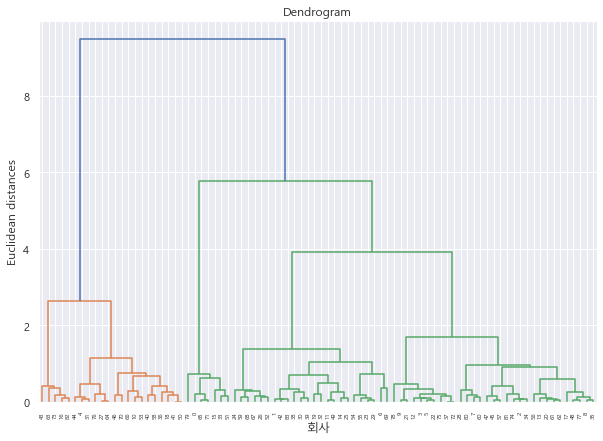

In [34]:
from scipy.cluster import hierarchy

# clustering에 사용할 변수 : unicorn_df의 4개 Scores
data = unicorn_df.iloc[:,0:4].values

# Dendrograms 시각화
plt.figure(figsize=(10, 7))
hc = hierarchy.linkage(data, method = 'ward')
dendrogram = hierarchy.dendrogram(hc)

plt.title('Dendrogram')
plt.xlabel('회사')
plt.ylabel('Euclidean distances')
plt.show()

In [115]:
# linkage matrix의 컬럼 의미
# column 1. index of a class
# column 2. index of other class
# column 3. distance between class
# column 4. sum of the numbers in a class and other class
hc

array([[4.10000000e+01, 5.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 7.20000000e+01, 9.61481343e-17, 2.00000000e+00],
       [2.70000000e+01, 6.40000000e+01, 3.33333333e-02, 2.00000000e+00],
       [4.50000000e+01, 5.70000000e+01, 4.71404521e-02, 2.00000000e+00],
       [1.10000000e+01, 4.90000000e+01, 4.71404521e-02, 2.00000000e+00],
       [4.80000000e+01, 7.70000000e+01, 4.71404521e-02, 2.00000000e+00],
       [5.00000000e+00, 2.20000000e+01, 4.71404521e-02, 2.00000000e+00],
       [8.00000000e+00, 3.50000000e+01, 4.71404521e-02, 2.00000000e+00],
       [6.10000000e+01, 6.20000000e+01, 4.71404521e-02, 2.00000000e+00],
       [6.50000000e+01, 7.10000000e+01, 5.00000000e-02, 2.00000000e+00],
       [2.30000000e+01, 2.90000000e+01, 5.77350269e-02, 2.00000000e+00],
       [9.00000000e+00, 2.10000000e+01, 5.77350269e-02, 2.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 6.66666667e-02, 2.00000000e+00],
       [4.20000000e+01, 8.30000000e+01, 6.66666667e

In [114]:
# dendrogram으로 원하는 cluster 수 찾기
# dendrogram 에서 distance가 가장 크게 변화하는 cluster 수 찾기

first_distance = hc[:, 2][0]   # hc의 세번째 컬럼이 distance between class이므로
subtraction_distance = []
for distance in hc[:, 2]:
    subtraction_distance.append(distance - first_distance)
    first_distance = distance
    
n_clusters = data.shape[0] - subtraction_distance.index(max(subtraction_distance))
n_clusters

2

#### K-means Clustering

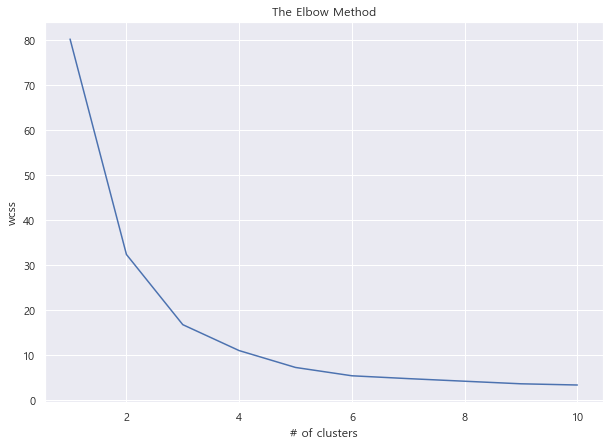

In [146]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 7))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

✔️ <b> hierarchical, k-means 모두 최적의 cluster 값은 2로 나오지만 5개 유니콘 기업 선별을 위해 클러스터 수를 6으로 진행

In [126]:
# kmeans에 KMeans() 모형 학습. y_kmeans에 predict 값 저장
# n_clusters = 6 

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data)

In [127]:
# y_kmeans 확인
y_kmeans

array([2, 1, 0, 1, 5, 1, 4, 0, 0, 1, 5, 4, 1, 0, 4, 2, 3, 0, 5, 4, 0, 1,
       1, 1, 4, 4, 4, 5, 1, 1, 1, 5, 4, 2, 0, 0, 5, 1, 1, 1, 5, 5, 1, 3,
       5, 0, 3, 0, 0, 4, 5, 2, 4, 5, 1, 1, 0, 0, 5, 4, 0, 0, 0, 3, 5, 2,
       5, 4, 4, 4, 3, 2, 1, 3, 0, 1, 5, 0, 1, 2, 0, 0, 3, 1])

In [128]:
# cluster_centers 확인
kmeans.cluster_centers_

array([[2.98083333, 0.4475    , 0.44583333, 0.4025    ],
       [2.46666667, 0.31269841, 0.3031746 , 0.4047619 ],
       [0.9       , 0.23333333, 0.21190476, 0.24047619],
       [4.55      , 0.60714286, 0.60952381, 0.54047619],
       [1.92083333, 0.36190476, 0.35059524, 0.31845238],
       [3.70222222, 0.46888889, 0.5       , 0.45111111]])

In [151]:
unicorn_df.head(1)

,P_sales,P_arpu,P_pension,P_employee,P_unicorn
회사ID,,,,,
126516,0.70,0.25,0.15,0.35,1.45


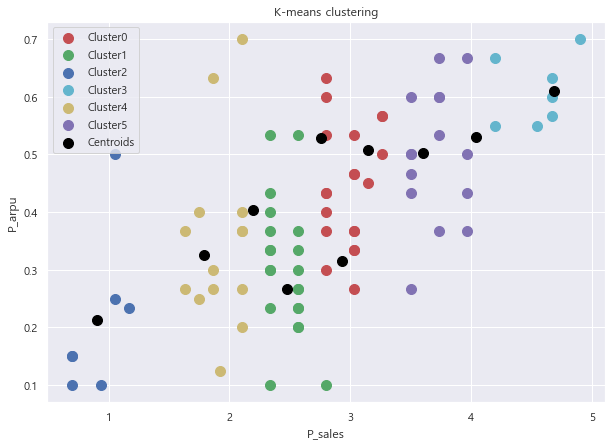

In [154]:
# 6개 클러스터별 색 구분하여 표시
# P_sales, P_arpu를 축으로 사용
plt.figure(figsize=(10, 7))

plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 2], s=100, c='r', label='Cluster0')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 2], s=100, c='g', label='Cluster1')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 2], s=100, c='b', label='Cluster2')
plt.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 2], s=100, c='c', label='Cluster3')
plt.scatter(data[y_kmeans==4, 0], data[y_kmeans==4, 2], s=100, c='y', label='Cluster4')
plt.scatter(data[y_kmeans==5, 0], data[y_kmeans==5, 2], s=100, c='m', label='Cluster5')

# cluster center 표시
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=100, c='black', label='Centroids')

plt.title('K-means clustering')
plt.xlabel('P_sales')
plt.ylabel('P_arpu')
plt.legend()
plt.show()